In [8]:
"""
AI-Powered Credit Card Fraud Detection project, covering tasks C-1 through C-6.

C-1: Exploratory Data Analysis (EDA) and Preprocessing
C-2: Build and Evaluate Baseline Model (Logistic Regression)
C-3: Implement SMOTE to handle class imbalance
C-4: Train Advanced Model (Random Forest)
C-5: Generate Final Performance Metrics and Comparison
C-6: Save the Final Trained Model
"""

'\nAI-Powered Credit Card Fraud Detection project, covering tasks C-1 through C-6.\n\nC-1: Exploratory Data Analysis (EDA) and Preprocessing\nC-2: Build and Evaluate Baseline Model (Logistic Regression)\nC-3: Implement SMOTE to handle class imbalance\nC-4: Train Advanced Model (Random Forest)\nC-5: Generate Final Performance Metrics and Comparison\nC-6: Save the Final Trained Model\n'

Loading the dataset...


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset loaded successfully.
Dataset contains 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fractional value: 0.0017304750013189597
Fraud Cases detected: 492
Valid Transactions: 284315
Total Transactions: 284807

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicate rows: 1081
After dropping duplicates: (283726, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      28372

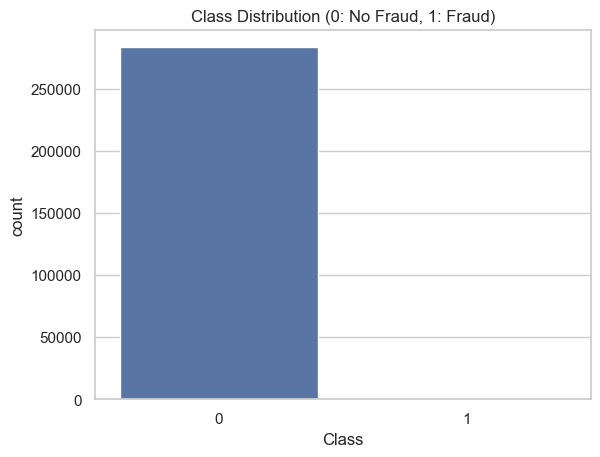

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


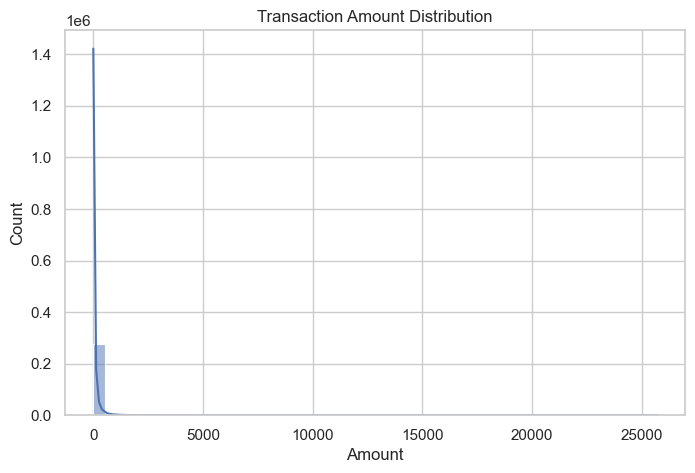

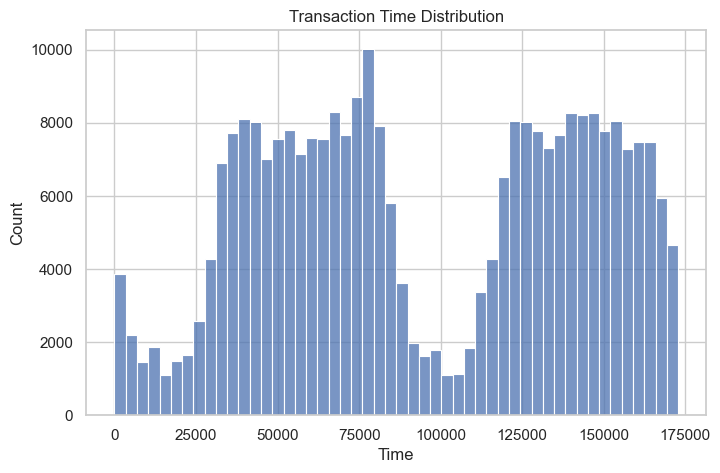

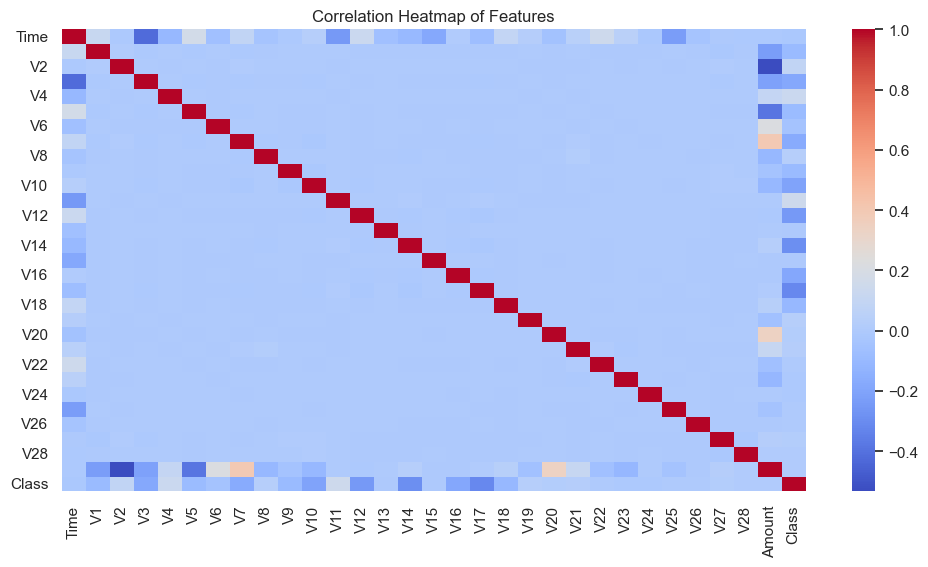

          ---Task C-1 complete---

=== C-2: Baseline Model — Logistic Regression (train & evaluate on original imbalanced data ===
Using existing train/test split.

=== Baseline Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56864
           1     0.8133    0.6224    0.7052        98

    accuracy                         0.9991     56962
   macro avg     0.9063    0.8111    0.8524     56962
weighted avg     0.9990    0.9991    0.9990     56962

ROC AUC: 0.9725


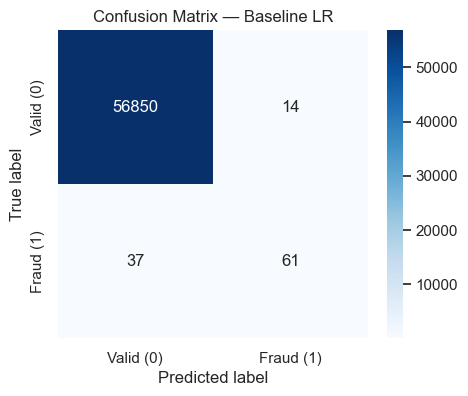

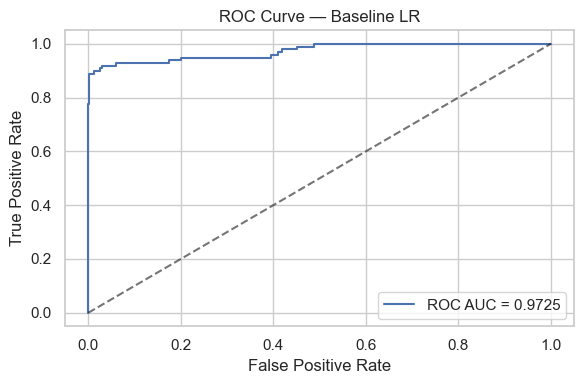

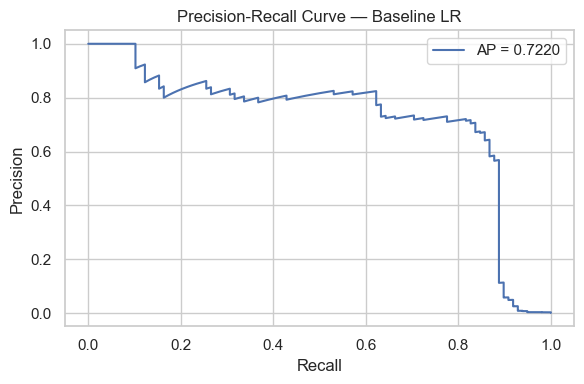


Notes:
- This baseline is trained on the original imbalanced data (no SMOTE/weighting).
- Use these results as a reference when you apply SMOTE or class-weighting in later tasks (C-3, C-4).
          ---Task C-2 complete---

=== C-3: Logistic Regression with SMOTE ===
Using existing train/test split for SMOTE step.
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC AUC: 0.9712541847070848
Average Precision: 0.6901560697095961


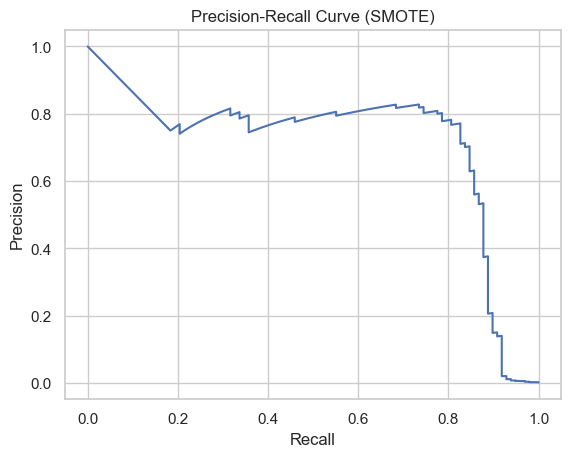

          ---Task C-3 complete---

--- Starting Task C-4: Train Advanced Model (Random Forest) ---
Training completed in 108.57 seconds.
--- Task C-4 Complete ---

--- Starting Task C-5: Generate Final Performance Metrics ---

Advanced Model (Random Forest) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.84      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Key Metric - Advanced Fraud Recall: 0.8367


C:\Users\0634901877\AppData\Local\Temp\ipykernel_22160\3333796698.py:252: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


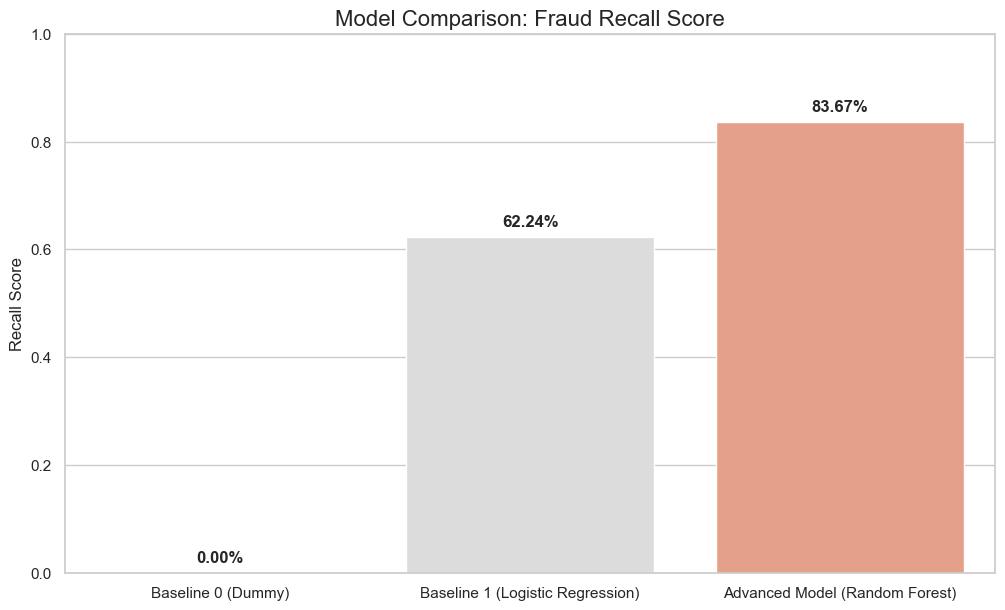


Generating Advanced Evaluation Curves for the Final Model...


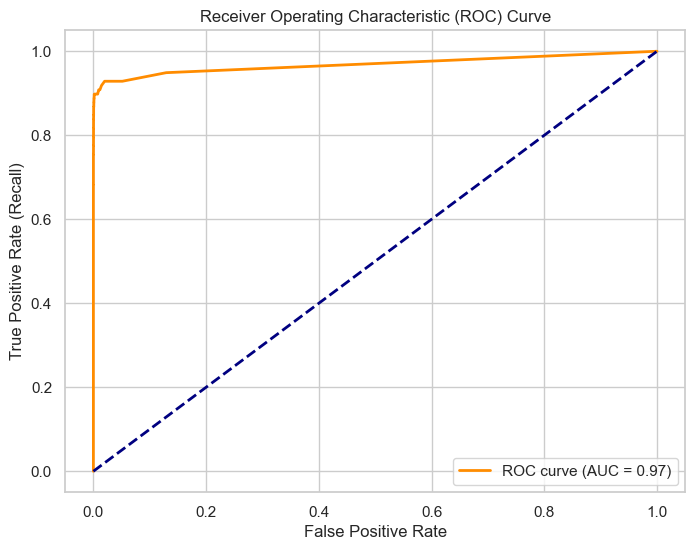

<Figure size 800x600 with 0 Axes>

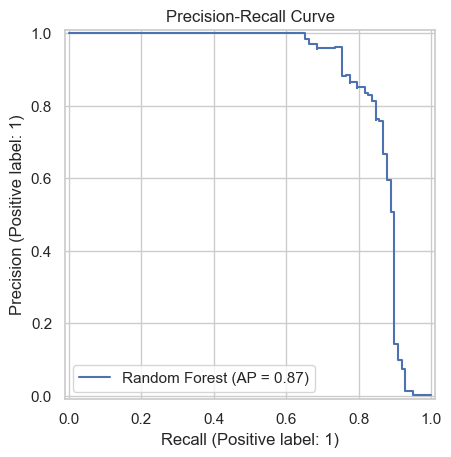

--- Task C-5 Complete ---

--- Starting Task C-6: Save Final Model ---
Model successfully saved to ../models\fraud_detection_model.joblib
--- Task C-6 Complete ---


In [15]:
# --- C-1: Exploratory Data Analysis (EDA) and Preprocessing ---
# ### 1. Importing Libraries
# These are the libraries we will be using for data manipulation, visualization, and machine learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import joblib

sns.set(style="whitegrid")


# ### 2. Loading the Data
print("Loading the dataset...")
try:
    df = pd.read_csv(r'C:\Users\0634901877\Downloads\Credit-Card-Fraud-Detection\Credit-Card-Fraud-Detection\data\creditcard.csv') 
    display(df.head())
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    print("Please ensure you have downloaded the dataset and placed it in the correct directory.")

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
display(df.describe())

# proportion of transactions that are fraud
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fractional_value = len(fraud)/(len(valid))
print("Fractional value:", fractional_value)

print("Fraud Cases detected: {}".format(len(df[df['Class'] == 1])))
print("Valid Transactions: {}".format(len(df[df['Class'] == 0])))
print("Total Transactions: {}".format(len(df)))


# === Missing Values & Duplicates ===
print("\nMissing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)
if df.isna().sum().sum() > 0:
    df = df.dropna()
    print("After dropping NA:", df.shape)


# === Dataset Info ===
print("\nDataset info:")
df.info()


# === Class Balance ===
fraud_counts = df['Class'].value_counts()
transaction = len(df)

fraud_percentage = (fraud_counts.get(1, 0) / transaction) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")
print("This confirms a severe class imbalance, which must be addressed in our modeling.")

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: No Fraud, 1: Fraud)")
plt.show()
print(df["Class"].value_counts(normalize=True))


# === Feature Distributions ===
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=50, kde=False)
plt.title("Transaction Time Distribution")
plt.show()


# === Correlation Heatmap ===
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()
print("          ---Task C-1 complete---")

# --- C-2: Baseline Model — Logistic Regression (train & evaluate on original imbalanced data) ---

print("\n=== C-2: Baseline Model — Logistic Regression (train & evaluate on original imbalanced data ===")
# Ensure X, y and a train/test split exist; create if missing
if 'X_train' not in globals() or 'X_test' not in globals():
    features = [c for c in df.columns if c not in ['Class', 'Amount', 'Time']]
    X = df[features]
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    print("Created train/test split:", X_train.shape, X_test.shape)
else:
    print("Using existing train/test split.")

# Train baseline logistic regression (no resampling here)
baseline_lr = LogisticRegression(max_iter=2000, random_state=42)
baseline_lr.fit(X_train, y_train)

# Predictions & probabilities
y_pred = baseline_lr.predict(X_test)
y_prob = baseline_lr.predict_proba(X_test)[:, 1]

# Metrics
print("\n=== Baseline Logistic Regression Evaluation ===")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Valid (0)","Fraud (1)"], yticklabels=["Valid (0)","Fraud (1)"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix — Baseline LR")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Baseline LR")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_prec = average_precision_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {avg_prec:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve — Baseline LR")
plt.legend()
plt.tight_layout()
plt.show()

print("\nNotes:")
print("- This baseline is trained on the original imbalanced data (no SMOTE/weighting).")
print("- Use these results as a reference when you apply SMOTE or class-weighting in later tasks (C-3, C-4).")

print("          ---Task C-2 complete---")

# --- C-3: Logistic Regression with SMOTE ---

# Note: SMOTE and other imports are available from earlier cells.
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

print("\n=== C-3: Logistic Regression with SMOTE ===")

# Ensure df is available; if not, attempt to load it from the project's dataset path
if 'df' not in globals():
	try:
		pd  # check if pandas is available
	except NameError:
		import pandas as pd
	try:
		df = pd.read_csv(r'C:\Users\0634901877\Downloads\Credit-Card-Fraud-Detection\Credit-Card-Fraud-Detection\data\creditcard.csv')
		print("Loaded df from disk for SMOTE step.")
	except FileNotFoundError:
		raise NameError("DataFrame 'df' is not defined and the default dataset file was not found. Run the data-loading cell before this one or place the dataset at the specified path.")

# Ensure the train/test split exists; create it if missing
if 'X_train' not in globals() or 'X_test' not in globals() or 'y_train' not in globals() or 'y_test' not in globals():
	features = [c for c in df.columns if c not in ['Class', 'Amount', 'Time']]
	X = df[features]
	y = df['Class']
	X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size=0.3, stratify=y, random_state=42
	)
	print("Created train/test split for SMOTE step:", X_train.shape, X_test.shape)
else:
	print("Using existing train/test split for SMOTE step.")

# Use existing smote instance if available, otherwise create one
try:
	smote
except NameError:
	smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train model
lr_smote = LogisticRegression(max_iter=2000, random_state=42)
lr_smote.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_sm = lr_smote.predict(X_test)
y_prob_sm = lr_smote.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred_sm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_sm))
print("Average Precision:", average_precision_score(y_test, y_prob_sm))

# Optional: Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_sm)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SMOTE)")
plt.show()
print("          ---Task C-3 complete---")

# --- C-4: TRAIN ADVANCED MODEL ---
print("\n--- Starting Task C-4: Train Advanced Model (Random Forest) ---")
start_time = time.time()
advanced_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
advanced_model.fit(X_train_balanced, y_train_balanced)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds.")
print("--- Task C-4 Complete ---")


# --- C-5: GENERATE FINAL PERFORMANCE METRICS AND COMPARE ---
print("\n--- Starting Task C-5: Generate Final Performance Metrics ---")
y_pred_advanced = advanced_model.predict(X_test)
y_prob_advanced = advanced_model.predict_proba(X_test)[:, 1]
advanced_recall = recall_score(y_test, y_pred_advanced)

print("\nAdvanced Model (Random Forest) Classification Report:")
print(classification_report(y_test, y_pred_advanced))
print(f"Key Metric - Advanced Fraud Recall: {advanced_recall:.4f}")

# --- Visual Comparison ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x=['Baseline 0 (Dummy)', 'Baseline 1 (Logistic Regression)', 'Advanced Model (Random Forest)'],
    y=[dummy_recall, baseline_recall, advanced_recall],
    palette='coolwarm'
)
plt.title('Model Comparison: Fraud Recall Score', fontsize=16)
plt.ylabel('Recall Score', fontsize=12)
plt.ylim(0, 1.0)
for index, value in enumerate([dummy_recall, baseline_recall, advanced_recall]):
    plt.text(index, value + 0.02, f'{value:.2%}', ha='center', fontsize=12, fontweight='bold')
plt.savefig(os.path.join(reports_dir, 'model_comparison_chart_final.png'))
plt.show()

# --- Advanced Evaluation Curves ---
print("\nGenerating Advanced Evaluation Curves for the Final Model...")
roc_auc = roc_auc_score(y_test, y_prob_advanced)
fpr, tpr, _ = roc_curve(y_test, y_prob_advanced)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(os.path.join(reports_dir, 'roc_curve.png'))
plt.show()

plt.figure(figsize=(8, 6))
disp = PrecisionRecallDisplay.from_predictions(y_test, y_prob_advanced, name='Random Forest')
disp.ax_.set_title('Precision-Recall Curve')
plt.savefig(os.path.join(reports_dir, 'precision_recall_curve.png'))
plt.show()
print("--- Task C-5 Complete ---")

# --- C-6: SAVE THE FINAL TRAINED MODEL ---

print("\n--- Starting Task C-6: Save Final Model ---")
model_path = os.path.join(models_dir, 'fraud_detection_model.joblib')
joblib.dump(advanced_model, model_path)
print(f"Model successfully saved to {model_path}")
print("--- Task C-6 Complete ---")
